### **가계부채+연체 기사검색**

In [1]:
from konlpy.tag import Okt
okt = Okt()
# 이게 잘 안되면 전용이지넷을 재부팅한다 

In [2]:
from gensim.models.doc2vec import Doc2Vec, TaggedDocument

In [3]:
from navsch import *

In [5]:
b_rng = pd.date_range('2002-01-01','2019-04-01',freq='MS').strftime('%Y.%m.%d').tolist()[:-1]
e_rng = pd.date_range('2002-01-01','2019-04-01',freq='M').strftime('%Y.%m.%d').tolist()

In [6]:
%%time
dfs = []
for beg, end in zip(b_rng,e_rng):
    s = time.time()
    dfs.append(naver_search_d('가계부채+연체',beg,end,pages=1))
    e = time.time() - s
    print('{}~{} done, {} elapsed'.format(beg,end,time.strftime('%H:%M:%S',time.gmtime(e))))
newsdf = pd.concat(dfs,axis=0)    
# Wall time: 1h 12min 22s
newsdf.to_pickle('data/newsdf_가계부채_연체_03_19.pkl')

2002.01.01~2002.01.31 done, 00:00:11 elapsed
2002.02.01~2002.02.28 done, 00:00:17 elapsed
2002.03.01~2002.03.31 done, 00:00:16 elapsed
2002.04.01~2002.04.30 done, 00:00:20 elapsed
2002.05.01~2002.05.31 done, 00:00:17 elapsed
2002.06.01~2002.06.30 done, 00:00:04 elapsed
2002.07.01~2002.07.31 done, 00:00:02 elapsed
2002.08.01~2002.08.31 done, 00:00:04 elapsed
2002.09.01~2002.09.30 done, 00:00:20 elapsed
2002.10.01~2002.10.31 done, 00:00:18 elapsed
2002.11.01~2002.11.30 done, 00:00:19 elapsed
2002.12.01~2002.12.31 done, 00:00:21 elapsed
2003.01.01~2003.01.31 done, 00:00:17 elapsed
2003.02.01~2003.02.28 done, 00:00:08 elapsed
2003.03.01~2003.03.31 done, 00:00:20 elapsed
2003.04.01~2003.04.30 done, 00:00:17 elapsed
2003.05.01~2003.05.31 done, 00:00:13 elapsed
2003.06.01~2003.06.30 done, 00:00:20 elapsed
2003.07.01~2003.07.31 done, 00:00:05 elapsed
2003.08.01~2003.08.31 done, 00:00:17 elapsed
2003.09.01~2003.09.30 done, 00:00:18 elapsed
2003.10.01~2003.10.31 done, 00:00:14 elapsed
2003.11.01

In [7]:
newsdf.ym.astype(int).agg([min,max])

min    200201
max    201903
Name: ym, dtype: int64

In [8]:
newsdf.head()

,ym,qry,date,title,text
0,200201,가계부채+연체,None,"[금융] ""가계부채 급격한 증가세..위험 징후""",머니투데이\n\n[머니투데이] 한국금융연구원은 31일 가계부채의 급격한 증가나 규모...
1,200201,가계부채+연체,None,"""가계부채 과도한 증가는 `금융불안' 초래""<금융연>",`신용카드 부실이 도화선'(서울=연합뉴스) 한승호기자 = 가계부채의 과도한 증가는 ...
2,200201,가계부채+연체,None,“가계부채 300조 초과…금융불안 요인”,가계부채의 과도한 증가는 금융시장의 불안요인으로 작용할 수 있다는 주장이 나왔다.최...
3,200201,가계부채+연체,None,가계부채 올해 400조 돌파 예상 .. 한국금융연구원,최근 급증하고 있는 가계부채 규모는 아직 우려할 만한 수준은 아니라고 한국금융연구원...
4,200201,가계부채+연체,None,[은행 가계대출 왜 줄이나] 개인파산 급증땐 경기회복 찬물,소비거품인가 아니면 경기가 바닥을 치면서 나타나는 일시적 현상인가.\n\n\n\n최...


In [9]:
newsdf = pd.read_pickle('data/newsdf_가계부채_연체_03_19.pkl')

**월별로 기사합치기: newsdf -> ndf**

In [11]:
ndf = newsdf.groupby(['ym','qry'])['text'].apply(lambda x: x.sum()).to_frame().reset_index()

In [12]:
ndf.head()

,ym,qry,text
0,200201,가계부채+연체,머니투데이\n\n[머니투데이] 한국금융연구원은 31일 가계부채의 급격한 증가나 규모...
1,200202,가계부채+연체,PICK 안내 해당 언론사가 주요기사로\n\n직접 선정한 기사입니다. 언론사 편집판...
2,200203,가계부채+연체,이번 호황기에 가계대출규모가 적정수준을 넘어설 경우 다음 침체기엔 가계부실화가 더욱...
3,200204,가계부채+연체,지난 3월중 은행의 가계대출은 7조6천9백50억원이 늘어나 최근의 급등세를 이어갔다...
4,200205,가계부채+연체,카드 빚을 못갚아 발생하는 신용불량자가 해마다 급증하고 있다.금융감독원에 따르면 L...


**Tokenize : 명사,형용사,부사만**

In [13]:
pos_list = ['Adjective','Adverb','Noun']
tok_p = lambda doc: ['/'.join(t) for t in okt.pos(doc) if t[1] in pos_list] # okt.pos(doc): (사스, Noun) => 사스/Noun

In [14]:
%%time
ndf['tok_txt'] = ndf.text.apply(tok_p) # tok_txt : tokenize된 text

Wall time: 7min 17s


**Doc2Vec**

In [15]:
import multiprocessing
cores = multiprocessing.cpu_count()
from tqdm import tqdm
tqdm.pandas(desc="progress-bar")
from sklearn import utils
cores

4

In [16]:
tagdoc = lambda txt, ym: [TaggedDocument(words=txt,tags=[ym])]

In [17]:
tag_txt = ndf.apply(lambda x: tagdoc(x.tok_txt,x.ym),axis=1) # tag_txt : doc2vec 입력용으로 변환, 기사별

In [18]:
tag_txt = [t for x in tag_txt for t in x] # tag_txt : 모델개발용으로 하나로 합침

In [19]:
%%time
# 토큰업로드
max_epochs = 30
vec_size = 10
alpha = 0.025

model_dbow_txt = Doc2Vec(dm=0,
                     vector_size=vec_size,
                     alpha=alpha, 
                     min_alpha=0.00025,
                     min_count=1,
                     workers=cores)
model_dbow_txt.build_vocab(tag_txt)
# 모델피팅
for epoch in range(30):
    model_dbow_txt.train(utils.shuffle([x for x in tqdm(tag_txt)]),
                    total_examples=model_dbow_txt.corpus_count,
                    epochs=10)
    model_dbow_txt.alpha -= 0.002
    model_dbow_txt.min_alpha = model_dbow_txt.alpha
# Wall time: 1min 36s    

100%|████████████████████████████████████| 203/203 [00:00<00:00, 202966.32it/s]


Wall time: 1min 36s


In [20]:
%%time
# 벡터라이징
dvec1 = list(map(lambda x: model_dbow_txt.infer_vector(x), ndf.tok_txt))
cname = ['dx'+str(i) for i in np.arange(1,vec_size+1)]
dvec1 = pd.DataFrame(dvec1,columns = cname)
# Wall time: 7.64 s

Wall time: 7.64 s


In [21]:
dvec1.head()

,dx1,dx2,dx3,dx4,dx5,dx6,dx7,dx8,dx9,dx10
0,-1.776291,1.542021,1.597268,0.751209,-1.631949,1.870075,2.680017,1.847535,0.437508,0.950329
1,-1.875534,1.670924,1.321456,0.831445,-1.589836,1.795084,2.737084,1.845110,0.428238,0.961790
2,-1.845810,1.604996,1.596623,0.861379,-1.735235,1.710102,2.655217,2.043782,0.195656,0.877945
3,-1.819431,1.612369,1.523840,1.058730,-1.659171,1.707307,2.584226,2.097419,0.331337,1.072828
4,-1.952735,1.450928,1.688740,0.928315,-1.603917,1.766953,2.551003,1.957331,0.449868,0.908663


In [22]:
bidx = pd.read_pickle('data/busil_idx.pkl')
bidx.ym = bidx.ym.astype(str)

In [23]:
ndf2 = pd.concat([ndf,dvec1],axis=1)

In [24]:
ndf2 = ndf2.merge(bidx,how='left',left_on='ym',right_on='ym')

In [25]:
ndf2['date'] = pd.to_datetime(ndf2.ym, format='%Y%m')

In [26]:
ndf2.head()

,ym,qry,text,tok_txt,dx1,dx2,dx3,dx4,dx5,dx6,dx7,dx8,dx9,dx10,cycle,tcycle,가계소득지표,가계소비지표,차입수준지표,date
0,200201,가계부채+연체,머니투데이\n\n[머니투데이] 한국금융연구원은 31일 가계부채의 급격한 증가나 규모...,"[머니투데이/Noun, 머니투데이/Noun, 한국/Noun, 금융/Noun, 연구원...",-1.776291,1.542021,1.597268,0.751209,-1.631949,1.870075,2.680017,1.847535,0.437508,0.950329,NaN,NaN,NaN,NaN,NaN,2002-01-01
1,200202,가계부채+연체,PICK 안내 해당 언론사가 주요기사로\n\n직접 선정한 기사입니다. 언론사 편집판...,"[안내/Noun, 해당/Noun, 언론사/Noun, 기사/Noun, 직접/Noun,...",-1.875534,1.670924,1.321456,0.831445,-1.589836,1.795084,2.737084,1.845110,0.428238,0.961790,NaN,NaN,NaN,NaN,NaN,2002-02-01
2,200203,가계부채+연체,이번 호황기에 가계대출규모가 적정수준을 넘어설 경우 다음 침체기엔 가계부실화가 더욱...,"[이번/Noun, 호황/Noun, 기/Noun, 가계/Noun, 대출/Noun, 규...",-1.845810,1.604996,1.596623,0.861379,-1.735235,1.710102,2.655217,2.043782,0.195656,0.877945,NaN,NaN,NaN,NaN,NaN,2002-03-01
3,200204,가계부채+연체,지난 3월중 은행의 가계대출은 7조6천9백50억원이 늘어나 최근의 급등세를 이어갔다...,"[지난/Noun, 은행/Noun, 가계/Noun, 대출/Noun, 백/Noun, 최...",-1.819431,1.612369,1.523840,1.058730,-1.659171,1.707307,2.584226,2.097419,0.331337,1.072828,NaN,NaN,NaN,NaN,NaN,2002-04-01
4,200205,가계부채+연체,카드 빚을 못갚아 발생하는 신용불량자가 해마다 급증하고 있다.금융감독원에 따르면 L...,"[카드/Noun, 빚/Noun, 발생/Noun, 신용/Noun, 불량/Noun, 해...",-1.952735,1.450928,1.688740,0.928315,-1.603917,1.766953,2.551003,1.957331,0.449868,0.908663,NaN,NaN,NaN,NaN,NaN,2002-05-01


In [27]:
ndf2.to_pickle('data/ndf2.pkl')

In [28]:
import seaborn as sns
import matplotlib.pyplot as plt

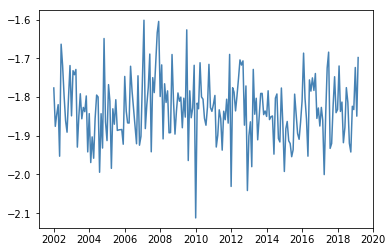

In [29]:
plt.plot_date('date','dx1','-',color='steelblue',data=ndf2)

In [40]:
import matplotlib.dates as mdates
years = mdates.YearLocator(base=3)
yrfmt = mdates.DateFormatter("'%y'")

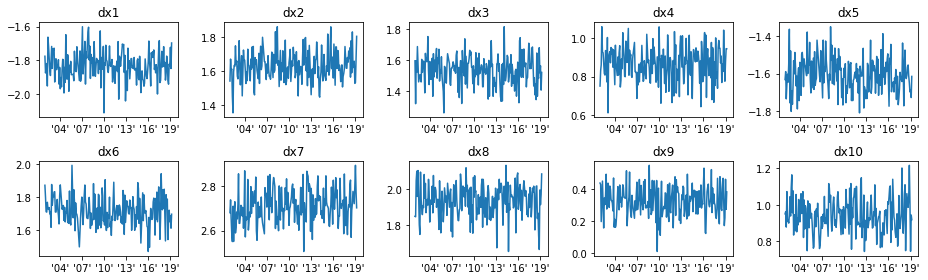

In [41]:
fig, ax = plt.subplots(2,5,figsize=(13,4))
n = 1
for i in range(2):
    for j in range(5):
        y = 'dx'+str(n)
        ax[i,j].plot_date('date',y,'-',data=ndf2)
        ax[i,j].set_title(y)
        ax[i,j].xaxis.set_major_locator(years)
        ax[i,j].xaxis.set_major_formatter(yrfmt)
        n += 1
plt.tight_layout()

In [42]:
import gc;gc.collect()

37968

### **PCA**

In [43]:
from sklearn.decomposition import PCA

In [52]:
pca = PCA(n_components=10)

In [53]:
pca1 = pca.fit(dvec1)

In [54]:
pca1.explained_variance_ratio_

array([0.16601812, 0.153602  , 0.12625247, 0.11193957, 0.10592423,
       0.09378838, 0.08763555, 0.07198153, 0.06639138, 0.01646678])

In [55]:
pca1.mean_

array([-1.83093189,  1.63190981,  1.53635553,  0.86591118, -1.60622456,
        1.71379837,  2.71125362,  1.93517887,  0.32675566,  0.94449348])

In [61]:
pcs = pca1.fit_transform(dvec1)

In [62]:
pcs = pd.DataFrame(pcs,columns = ['pc'+str(i+1) for i in range(10)])

In [63]:
pcs.head()

,pc1,pc2,pc3,pc4,pc5,pc6,pc7,pc8,pc9,pc10
0,-0.188696,-0.022022,0.004274,0.027130,-0.111743,-0.099001,-0.098589,0.001779,-0.070836,0.010007
1,-0.002505,0.177529,-0.102165,0.129276,-0.048528,-0.053892,-0.072567,-0.084523,0.022578,-0.016821
2,0.068305,-0.080767,0.017485,-0.187706,-0.026470,0.077103,-0.026847,-0.016484,-0.058190,-0.007344
3,0.071024,-0.074221,-0.127780,-0.102695,0.209445,-0.011361,-0.103424,0.081512,0.029655,-0.000348
4,0.007739,-0.123667,0.111918,-0.050770,0.072582,-0.225418,-0.138297,0.030123,-0.116468,-0.003368


In [64]:
ndf3 = pd.concat([ndf2,pcs], axis=1)

In [74]:
ndf3.to_pickle('data/ndf3.pkl')
ndf3.to_pickle('o:/보낼파일함/ndf3.pkl')

In [75]:
gc.collect()

156608

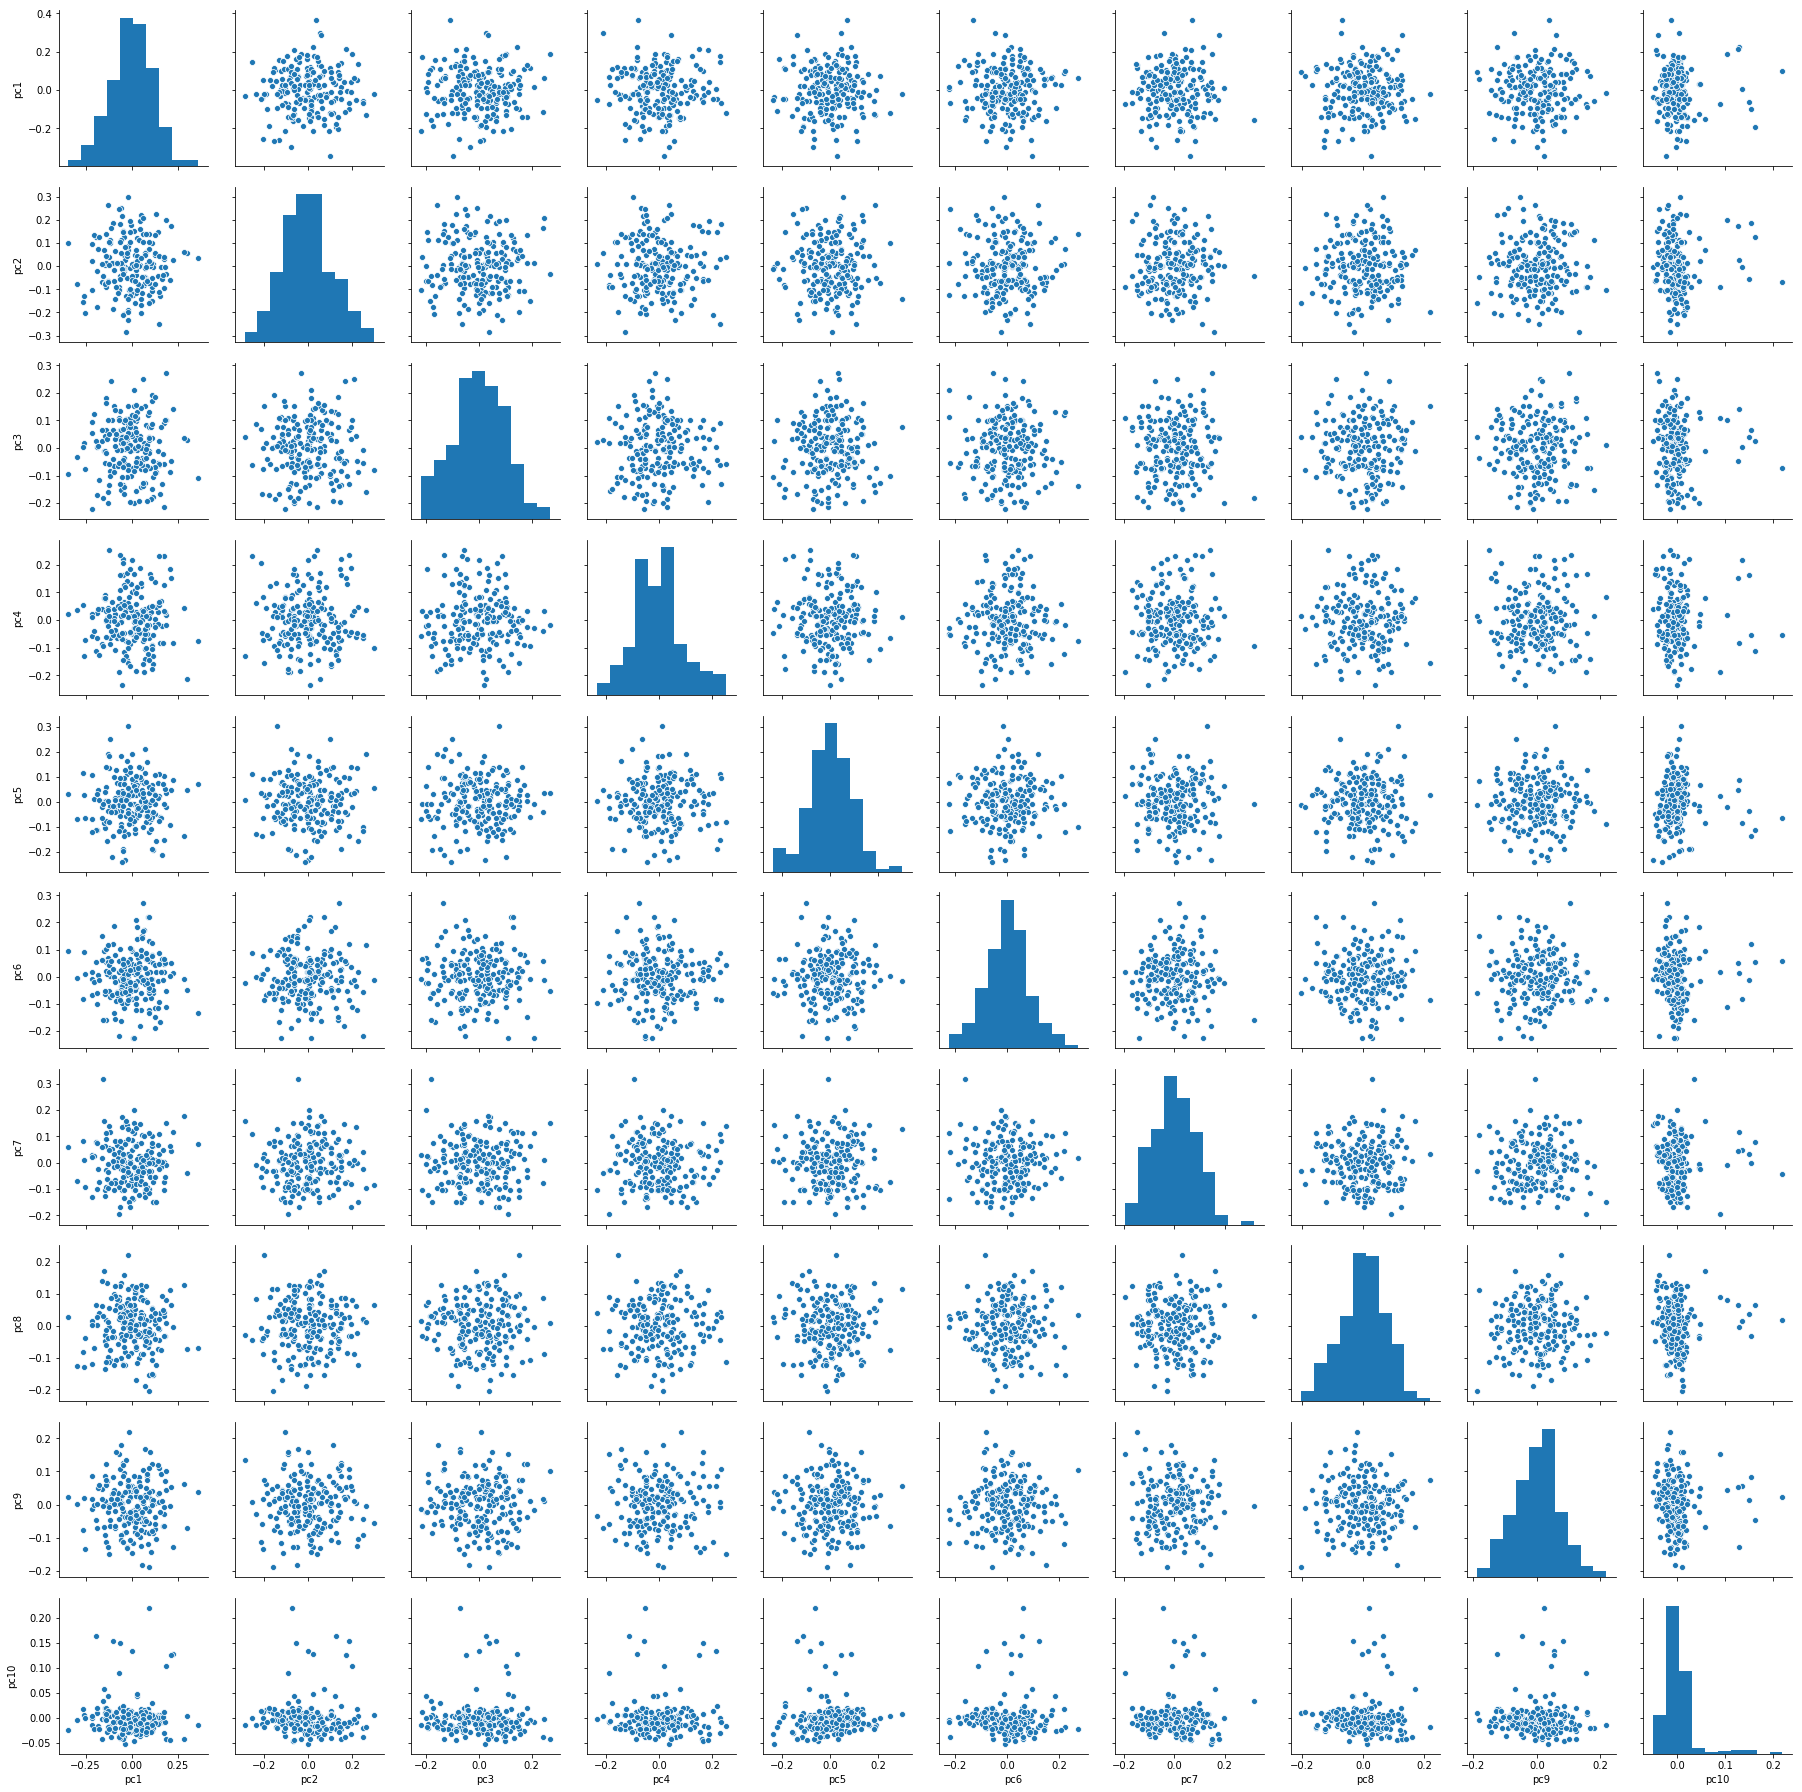

In [68]:
sns.pairplot(pcs)

In [ ]:
sns.pairplot(dvec1)